In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("NY-House-Dataset.csv")

In [7]:
df_shuffled = df.sample(frac=1, random_state=42)

df_learning, df_validation = train_test_split(df_shuffled, test_size=0.3, random_state=42)

df_learning = df_learning.reset_index(drop = True)
df_validation = df_validation.reset_index(drop = True)

## **Wstępna analiza**

In [8]:
df_learning.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran Chelsea/Flatiron,House for sale,6250000,4,2.000000,4500.000000,26 E 22nd St # 2/3,"New York, NY 10010","26 E 22nd St # 2/3New York, NY 10010",United States,New York,New York County,New York,East 22nd Street,"26 E 22nd St, New York, NY 10010, USA",40.739891,-73.988265
1,Brokered by Exp Realty,Multi-family home for sale,1390000,6,5.000000,2245.000000,104-30 219th St,"Jamaica, NY 11429","104-30 219th StJamaica, NY 11429",United States,New York,Queens County,Queens,219th Street,"104-30 219th St, Jamaica, NY 11429, USA",40.711113,-73.736178
2,Brokered by Remax Edge - RE/MAX EDGE,Co-op for sale,300000,1,1.000000,800.000000,2942 W 5th St Apt 11S,"Brooklyn, NY 11224","2942 W 5th St Apt 11SBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,2942,"2942 W 5th St #11d, Brooklyn, NY 11224, USA",40.577408,-73.973259
3,Brokered by Century 21 Realty First,Multi-family home for sale,2288000,6,4.000000,3280.000000,1774 70th St,"Brooklyn, NY 11204","1774 70th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,70th Street,"1774 70th St, Brooklyn, NY 11204, USA",40.616415,-73.993804
4,Brokered by Pantiga Group Inc.,Co-op for sale,175000,1,1.000000,800.000000,190 E Mosholu Pkwy S Apt 3B,"Bronx, NY 10458","190 E Mosholu Pkwy S Apt 3BBronx, NY 10458",New York,Bronx County,The Bronx,West Bronx,190,"190 E Mosholu Pkwy S #3b, Bronx, NY 10458, USA",40.874295,-73.883753
5,Brokered by BESMATCH REAL ESTATE,Co-op for sale,99000,1,1.000000,850.000000,1177 Anderson Ave Apt 2D,"Bronx, NY 10452","1177 Anderson Ave Apt 2DBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1177,"1177 Anderson Ave #2d, Bronx, NY 10452, USA",40.836450,-73.924271
6,Brokered by RE MAX Edge,Co-op for sale,499000,2,1.000000,686.000000,430 W 46th St Apt 5E,"Manhattan, NY 10036","430 W 46th St Apt 5EManhattan, NY 10036",New York,New York County,New York,Manhattan,430,"430 W 46th St #5a, New York, NY 10036, USA",40.761555,-73.992369
7,"Brokered by Foxworth Realty, Inc.",Co-op for sale,299900,1,1.000000,2184.207862,3017 Riverdale Ave Apt 2J,"Bronx, NY 10463","3017 Riverdale Ave Apt 2JBronx, NY 10463",New York,Bronx County,The Bronx,Spuyten Duyvil,3017,"3017 Riverdale Ave #2j, Bronx, NY 10463, USA",40.880985,-73.910233
8,Brokered by Real Broker NY LLC,House for sale,849000,3,2.000000,2184.207862,11019 Saultell Ave,"Corona, NY 11368","11019 Saultell AveCorona, NY 11368",United States,New York,Queens County,Queens,Saultell Avenue,"110-19 Saultell Ave, Flushing, NY 11368, USA",40.739887,-73.850613
9,Brokered by EZ Premier Realty LLC.,Land for sale,1002500,3,2.373861,2184.207862,667 W 246th St,"Bronx, NY 10471","667 W 246th StBronx, NY 10471",United States,New York,Bronx County,The Bronx,West 246th Street,"667 W 246th St, Bronx, NY 10471, USA",40.892224,-73.912763


In [9]:
df_learning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3360 non-null   object 
 1   TYPE                         3360 non-null   object 
 2   PRICE                        3360 non-null   int64  
 3   BEDS                         3360 non-null   int64  
 4   BATH                         3360 non-null   float64
 5   PROPERTYSQFT                 3360 non-null   float64
 6   ADDRESS                      3360 non-null   object 
 7   STATE                        3360 non-null   object 
 8   MAIN_ADDRESS                 3360 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  3360 non-null   object 
 10  LOCALITY                     3360 non-null   object 
 11  SUBLOCALITY                  3360 non-null   object 
 12  STREET_NAME                  3360 non-null   object 
 13  LONG_NAME         

In [10]:
df_learning.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [34]:
df_num = df_learning[["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]]
df_num.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,2.473845e+06,3.342262,2.355809,2185.585046
std,3.736308e+07,2.656050,1.951546,2520.203064
min,2.494000e+03,1.000000,0.000000,230.000000
25%,4.800000e+05,2.000000,1.000000,1200.000000
50%,8.150000e+05,3.000000,2.000000,2184.207862
75%,1.475000e+06,4.000000,3.000000,2184.207862
max,2.147484e+09,50.000000,50.000000,65535.000000


array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDS'}>],
       [<AxesSubplot: title={'center': 'BATH'}>,
        <AxesSubplot: title={'center': 'PROPERTYSQFT'}>]], dtype=object)

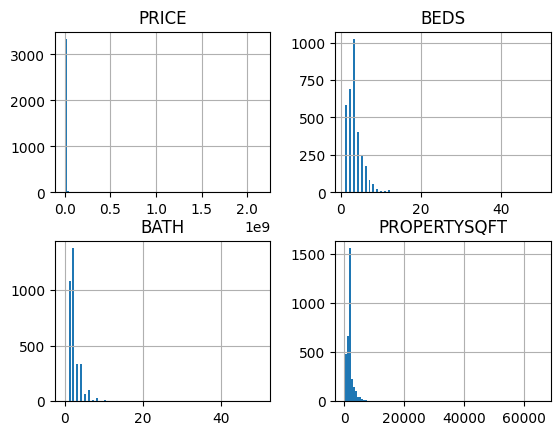

In [33]:
df_num.hist(bins=100)

array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDS'}>],
       [<AxesSubplot: title={'center': 'BATH'}>,
        <AxesSubplot: title={'center': 'PROPERTYSQFT'}>]], dtype=object)

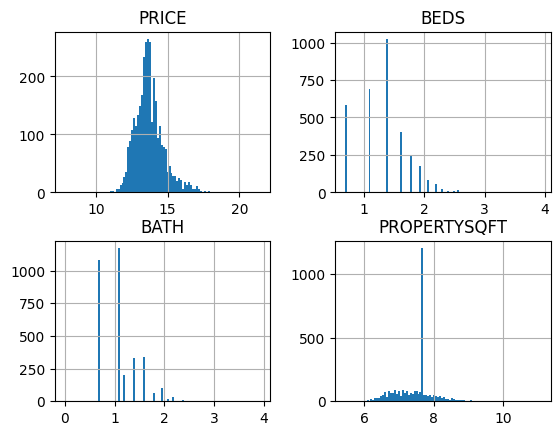

In [32]:
np.log1p(df_num).hist(bins=100)

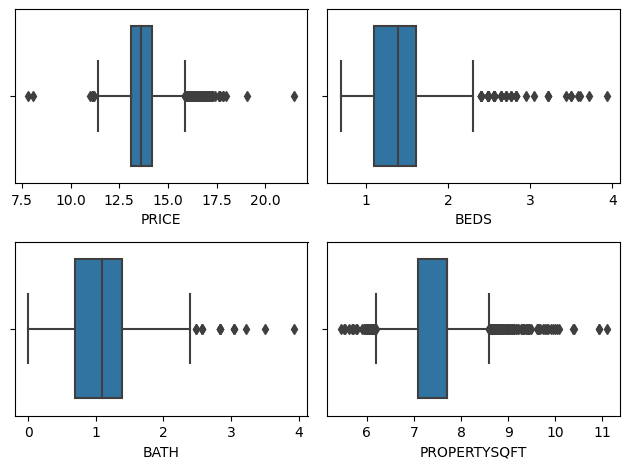

In [61]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

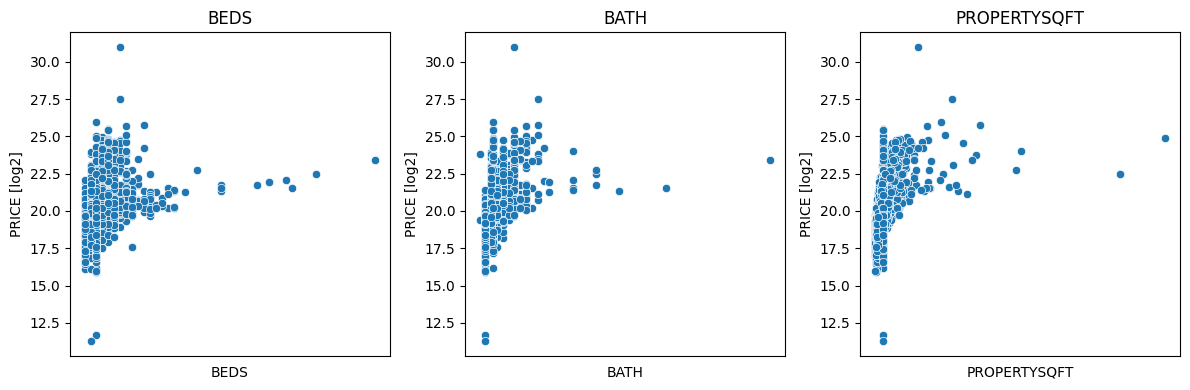

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log2(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log2]")

plt.tight_layout()
plt.show()

In [15]:
for col in df.columns:
    if df[col].dtype == object:
        df_tmp = df_learning[[col, "PRICE"]]
        df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
        df_tmp.columns = [col, "MEAN_PRICE"]
        
        df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
        df_count.columns = [col, "count"]
        
        print(col + " highest MEAN_PRICE")
        print(pd.merge(df_tmp, df_count, on= col).sort_values("MEAN_PRICE", ascending=False).reset_index(drop= True))
        
        print(col + " biggest occurrence")
        print(pd.merge(df_tmp, df_count, on= col).sort_values("count", ascending=False).reset_index(drop= True))
        print("----------------------------------------\n")
        

BROKERTITLE highest MEAN_PRICE
                                           BROKERTITLE    MEAN_PRICE  count
0                    Brokered by ANNE LOPA REAL ESTATE  2.147484e+09      1
1                                  Brokered by Reserve  3.200000e+07      1
2           Brokered by EVERGREEN REALTY & INVESTMENTS  3.150000e+07      1
3                       Brokered by New York Residence  1.200000e+07      1
4    Brokered by Brown Harris Stevens - 43 North Mo...  1.181950e+07      2
..                                                 ...           ...    ...
871                  Brokered by Lopez Realty Team Inc  1.190000e+05      1
872         Brokered by Coldwell Banker Signature Prop  1.150000e+05      1
873             Brokered by Keller Williams City Views  1.090000e+05      1
874                   Brokered by Bizzarro Agency, LLC  1.050000e+05      1
875                 Brokered by RE MAX Boutique Realty  9.000000e+04      1

[876 rows x 3 columns]
BROKERTITLE biggest occurrence
  

## **Usuwanie zbędnych kolumn**

In [64]:
df_dropped = df_learning[["BROKERTITLE", "TYPE", "BEDS", "BATH", "PROPERTYSQFT", "SUBLOCALITY", "LONG_NAME", "PRICE"]]
df_dropped.head()

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,LONG_NAME,PRICE
0,Brokered by Corcoran Chelsea/Flatiron,House for sale,4,2.0,4500.0,New York County,East 22nd Street,6250000
1,Brokered by Exp Realty,Multi-family home for sale,6,5.0,2245.0,Queens County,219th Street,1390000
2,Brokered by Remax Edge - RE/MAX EDGE,Co-op for sale,1,1.0,800.0,Brooklyn,2942,300000
3,Brokered by Century 21 Realty First,Multi-family home for sale,6,4.0,3280.0,Kings County,70th Street,2288000
4,Brokered by Pantiga Group Inc.,Co-op for sale,1,1.0,800.0,The Bronx,190,175000


## **Outliery**

In [76]:
cols = ["PRICE", "PROPERTYSQFT"]
df_percentile = df_dropped

for col in cols:
    n = df_percentile.shape[0]
    print('Wejściowy rozmiar: ', n)

    upper_lim = df_percentile[col].quantile(.95)
    lower_lim = df_percentile[col].quantile(.05)

    df_percentile = df_percentile[(df_percentile[col] < upper_lim) & (df_percentile[col] > lower_lim)]
    
    m = df_percentile.shape[0]
    print('Wyjściowy rozmiar: ', m)
    print('Usunięto %: ', (1-m/n)*100)

Wejściowy rozmiar:  3360
Wyjściowy rozmiar:  3021
Usunięto %:  10.089285714285712
Wejściowy rozmiar:  3021
Wyjściowy rozmiar:  2704
Usunięto %:  10.493214167494202


In [77]:
cols = ["BATH", "BEDS"]

for col in cols:
    n = df_percentile.shape[0]
    print('Wejściowy rozmiar: ', n)

    upper_lim = df_percentile[col].quantile(.95)

    df_percentile = df_percentile[(df_percentile[col] < upper_lim)]
    
    m = df_percentile.shape[0]
    print('Wyjściowy rozmiar: ', m)
    print('Usunięto %: ', (1-m/n)*100)

Wejściowy rozmiar:  2704
Wyjściowy rozmiar:  2370
Usunięto %:  12.352071005917164
Wejściowy rozmiar:  2370
Wyjściowy rozmiar:  2247
Usunięto %:  5.189873417721524


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

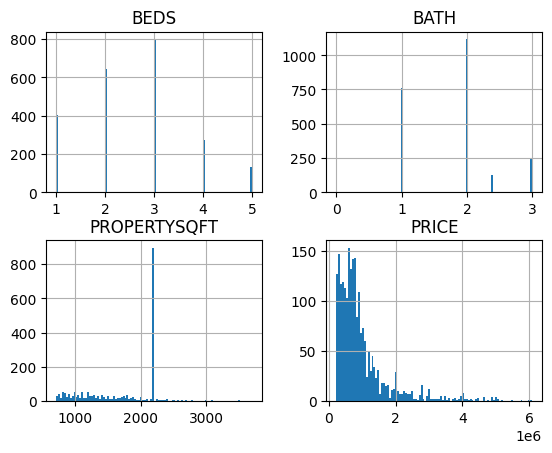

In [78]:
df_percentile.hist(bins=100)

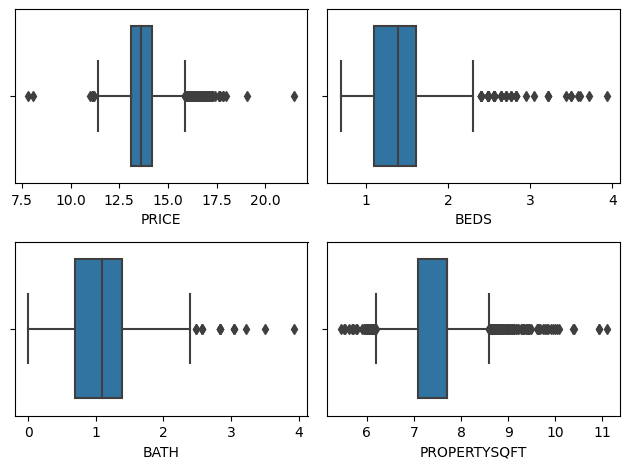

In [80]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

##  **Grouping & Binning**